# Tutorial: Computing with shapes of landmarks in Kendall shape spaces

In [1]:
import os
import sys
import warnings

sys.path.append(os.path.dirname(os.getcwd()))
warnings.filterwarnings('ignore')

In [13]:
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import geomstats.backend as gs
import geomstats.datasets.utils as data_utils
from geomstats.geometry.pre_shape import PreShapeSpace, KendallShapeMetric

We first import the dataset of the optical nerve heads from 22 images of Rhesus monkeys’ eyes (11 monkeys), available in (PE2015). 

For each monkey, an experimental glaucoma was introduced in one eye, while the second
eye was kept as control. One seeks to observe differences between the glaucoma and the
control eyes. On each image, 5 anatomical landmarks were recorded: 
- 1st landmark: superior aspect of the retina, 
- 2nd landmark: side of the retina closest to the temporal bone of the skull,
- 3rd landmark: nose side of the retina, 
- 4th landmark: inferior point,
- 5th landmark: optical nerve head deepest point.

Label 0 refers to a normal eye, and Label 1 to an eye with glaucoma.

##### Reference:

(PE2015) Patrangenaru and L. Ellingson. Nonparametric Statistics on Manifolds and Their Applications to Object Data, 2015. https://doi.org/10.1201/b18969

In [21]:
nerves, labels, monkeys = data_utils.load_optical_nerves()
print(nerves.shape)

ValueError: not enough values to unpack (expected 3, got 2)

In [20]:
print(labels.shape)

(22,)


In [19]:
import numpy as np

np.repeat(np.arange(11), 2)

array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
        8,  9,  9, 10, 10])

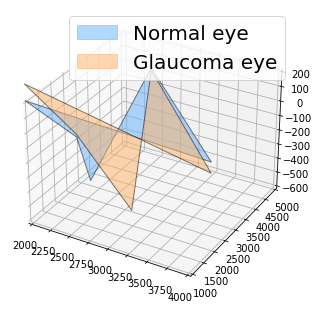

In [14]:
first_eye = nerves[0, :, :]
label_first_eye = labels[0]
second_eye = nerves[1, :, :]
label_second_eye = labels[1]

label_to_str = {0: 'Normal eye', 1: 'Glaucoma eye'}
label_to_col = {0: (102/255, 178/255, 255/255, 1.), 1: (255/255, 178/255, 102/255, 1.)}

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim((2000, 4000))
ax.set_ylim((1000, 5000))
ax.set_zlim((-600, 200))

for eye, label in zip([first_eye, second_eye], [label_first_eye, label_second_eye]):
    x = eye[:, 0]
    y = eye[:, 1]
    z = eye[:, 2]

    verts = [list(zip(x,y,z))]
    
    poly = Poly3DCollection(verts, alpha=0.5)
    color =  label_to_col[int(label)]
    poly.set_color(colors.rgb2hex(color))
    poly.set_edgecolor('k')
    ax.add_collection3d(poly)

patch_0 = mpatches.Patch(color=label_to_col[0], label=label_to_str[0], alpha=0.5)
patch_1 = mpatches.Patch(color=label_to_col[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={'size':20})
plt.show()

In [ ]:
m_ambient = 3
k_landmarks = 5


preshape = PreShapeSpace(m_ambient=m_ambient, k_landmarks=k_landmarks)
kendall_metric = KendallShapeMetric(m_ambient, k_landmarks)

In [3]:
data_preshape = preshape.projection(data)
print(gs.all(preshape.belongs(data_preshape)))

True


In [4]:
pairwise = metric.dist_pairwise(data_preshape)

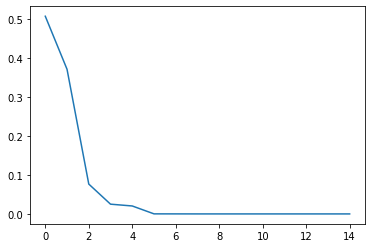

In [62]:
from geomstats.learning.pca import TangentPCA

tpca = TangentPCA(metric)
tpca.fit(data_preshape)

plt.plot(tpca.explained_variance_ratio_);

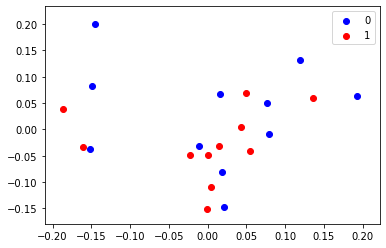

In [60]:
X = tpca.transform(data_preshape)

for label, col in zip([0, 1], ['b', 'r']):
    mask = labels == label
    plt.scatter(X[mask, 0], X[mask, 1], c=col, label=label);
plt.legend();